# Workshop Task (Classification)

Perform classification on Iris Dataset which is available for download from the UCI Machine Learning Repository. It should include:

1. Load the data into a PySpark DataFrame (https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)
2. Prepare the data for classification. This typically involves selecting the features and labels, and possibly scaling or transforming the data.
3. Split the data into training (70%) and test set (30%)
4. Train a classification model using the training data using Random Forest classifier (https://spark.apache.org/docs/3.1.3/api/python/reference/api/pyspark.ml.classification.RandomForestClassifier.html)
5. Predict the labels of the test data
6. Evaluate the model performance using any of the classification metrics like accuracy, f1 score, precision, recall etc. (https://spark.apache.org/docs/3.1.3/api/python/reference/api/pyspark.ml.evaluation.MulticlassClassificationEvaluator.html?highlight=multiclassclassificationevaluator#pyspark.ml.evaluation.MulticlassClassificationEvaluator)

# Data Pre-processing

In [4]:
import numpy as pd
import pandas as pd
import pyspark
import os
import urllib
import sys
from pyspark.sql.functions import *
from pyspark.ml.classification import *
from pyspark.ml.evaluation import *
from pyspark.ml.feature import *

#else
import warnings
warnings.filterwarnings("ignore")

In [5]:
spark=pyspark.sql.SparkSession.builder.appName('Iris').getOrCreate()

In [6]:
print('Python version: {}'.format(sys.version))
print('Spark version: {}'.format(spark.version))

Python version: 3.8.11 (default, Feb  3 2023, 19:22:24) 
[Clang 14.0.0 (clang-1400.0.29.202)]
Spark version: 3.3.1


## 1. Load and Read the data
Load the data into a PySpark DataFrame from various sources such as CSV, Parquet, Avro, and more.

In [7]:
#Two method to read csv file:
#1) "df = spark.read.csv('file.csv', header=True, inferSchema=True)" is efficient and recommended when working with 
#large datasets, as it is optimized for performance and can handle data processing in a distributed manner.

#2) This following method is slower for large dataset, but good for complex pre-processing on data
df=spark.createDataFrame(pd.read_csv('./dataset/iris.data', header=None, names=['sepal-length','sepal-width',
                                                                                'petal-length','petal-width','class']))
df.show()

+------------+-----------+------------+-----------+-----------+
|sepal-length|sepal-width|petal-length|petal-width|      class|
+------------+-----------+------------+-----------+-----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|
|         4.4|        2.9|         1.4|        0.2|Iris-setosa|
|         4.9|        3.1|         1.5|        0.1|Iris-setosa|
|         5.4|        3.7|         1.5|        0.2|Iris-setosa|
|         4.8|        3.4|         1.6|        0.2|Iris-setosa|
|         4.8|        3.0|         1.4| 

In [8]:
df.head()

Row(sepal-length=5.1, sepal-width=3.5, petal-length=1.4, petal-width=0.2, class='Iris-setosa')

In [9]:
df.describe()

DataFrame[summary: string, sepal-length: string, sepal-width: string, petal-length: string, petal-width: string, class: string]

In [10]:
df.dtypes

[('sepal-length', 'double'),
 ('sepal-width', 'double'),
 ('petal-length', 'double'),
 ('petal-width', 'double'),
 ('class', 'string')]

In [11]:
df.describe().show()

+-------+------------------+------------------+------------------+------------------+--------------+
|summary|      sepal-length|       sepal-width|      petal-length|       petal-width|         class|
+-------+------------------+------------------+------------------+------------------+--------------+
|  count|               150|               150|               150|               150|           150|
|   mean| 5.843333333333334|             3.054| 3.758666666666667|1.1986666666666668|          null|
| stddev|0.8280661279778632|0.4335943113621739|1.7644204199522624|0.7631607417008411|          null|
|    min|               4.3|               2.0|               1.0|               0.1|   Iris-setosa|
|    max|               7.9|               4.4|               6.9|               2.5|Iris-virginica|
+-------+------------------+------------------+------------------+------------------+--------------+



In [12]:
print('Rows: ', df.count())
print('Columns: ', len(df.columns))

Rows:  150
Columns:  5


In [13]:
df.groupBy("class").agg(count("*").alias("count")).show()

+---------------+-----+
|          class|count|
+---------------+-----+
|    Iris-setosa|   50|
|Iris-versicolor|   50|
| Iris-virginica|   50|
+---------------+-----+



## 2. Handle missing values
Identify and handle missing values in the data using PySpark functions such as fillna(), dropna(), and replace().

In [ ]:
#check if any null value
null_count = df.dropna(how='any').count()

if null_count == df.count():
    print("Data does not contain any null values.")
else:
    print("Data contains null values.")
    
#check if any zero
zero_count = df.filter(col("sepal-length") == 0).count() + \
             df.filter(col("sepal-width") == 0).count() + \
             df.filter(col("petal-length") == 0).count() + \
             df.filter(col("petal-width") == 0).count()

if zero_count == 0:
    print("Data does not contain any zero values.")
else:
    print("Data contains zero values.")

## 3. Data cleaning (Skipped)
Perform data cleaning operations such as removing duplicates, correcting data format, and standardizing the data.

## 4. Data visualization

In [19]:
#visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
import matplotlib.pyplot as plt

# Convert PySpark DataFrame to Pandas DataFrame
pdf = df.toPandas()


### Scartter Plot

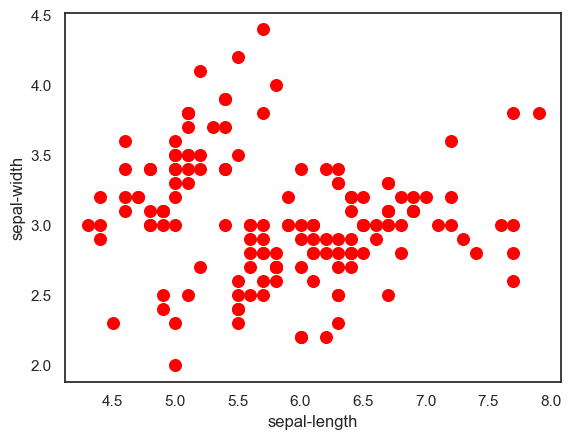

In [20]:
# Create scatter plot
pdf.plot(kind='scatter', x='sepal-length', y='sepal-width', 
         color="red", s=70)

# Display plot
plt.show()

### Pairplot

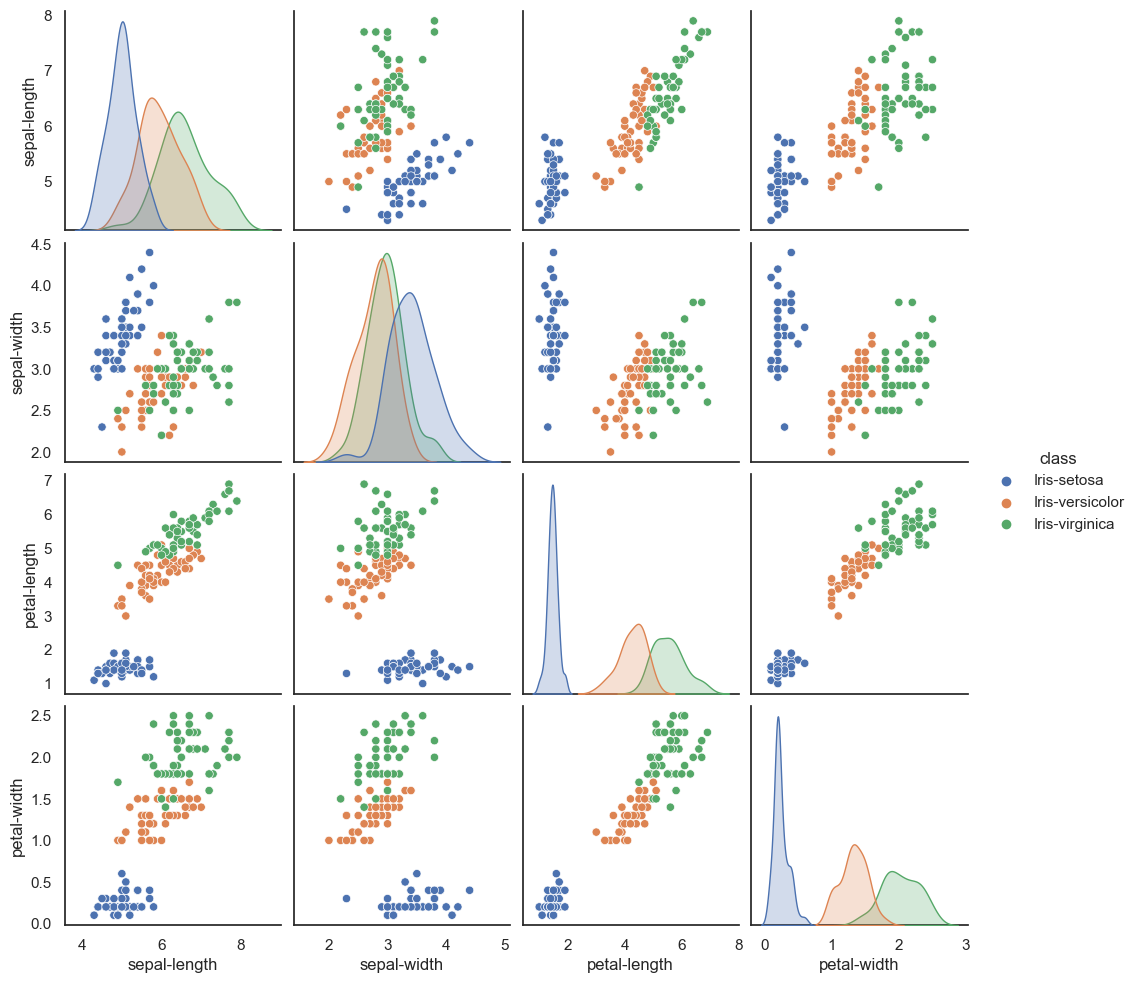

In [17]:
# Use seaborn to create a pairplot
sns.pairplot(pdf, hue='class')

# Show the plot
plt.show()

### Box Plot

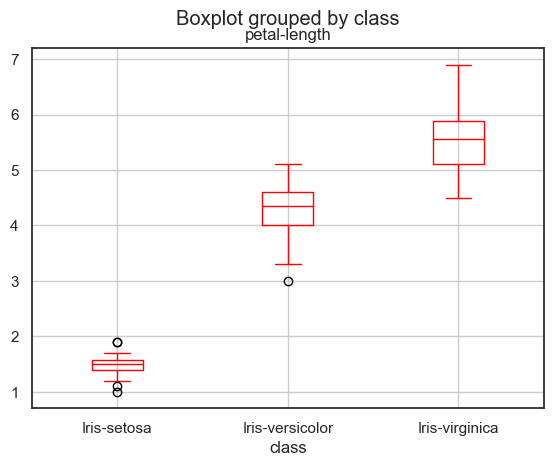

In [32]:
#create boxplot
pdf.boxplot(column='petal-length', by='class', color = 'red')
plt.show()

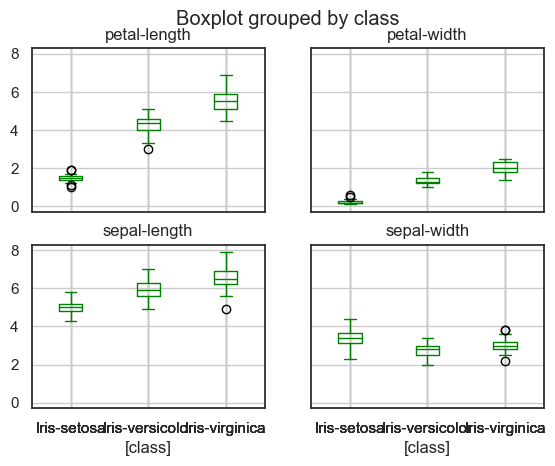

In [34]:
#create group by boxplot
pdf.boxplot(by='class', color = 'green')
plt.show()

## 5. Data transformation (Skipped)
Transform the data using PySpark functions such as map(), filter(), and groupBy() to reshape the data and prepare it for analysis.

## 6. Feature Engineering
Create new features from existing data by aggregating, transforming, and combining columns.

In [18]:
#create new list of column names of df excluding the last column
feature_col = df.columns[:-1]
#input in and output a new feature that group all input into one
assem = pyspark.ml.feature.VectorAssembler(inputCols=feature_col, outputCol='features')
#create a new df with the old df and the new feature
df1 = assem.transform(df)

df1.show()

+------------+-----------+------------+-----------+-----------+-----------------+
|sepal-length|sepal-width|petal-length|petal-width|      class|         features|
+------------+-----------+------------+-----------+-----------+-----------------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|[5.1,3.5,1.4,0.2]|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|[4.9,3.0,1.4,0.2]|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|[4.7,3.2,1.3,0.2]|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|[4.6,3.1,1.5,0.2]|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|[5.0,3.6,1.4,0.2]|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|[5.4,3.9,1.7,0.4]|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|[4.6,3.4,1.4,0.3]|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|[5.0,3.4,1.5,0.2]|
|         4.4|        2.9|         1.4|        0.2|Iris-setosa|[4.4,2.9,1.4,0.2]|
|         4.9|  

In [48]:
# turn class into indexes
df1 = df1.select(['features', 'class'])
label_indexer = pyspark.ml.feature.StringIndexer(inputCol='class', outputCol='label').fit(df1)
df2 = label_indexer.transform(df1)

df2.show(10)
#where label is 1, 2 and 3 according to its class

+-----------------+-----------+-----+
|         features|      class|label|
+-----------------+-----------+-----+
|[5.1,3.5,1.4,0.2]|Iris-setosa|  0.0|
|[4.9,3.0,1.4,0.2]|Iris-setosa|  0.0|
|[4.7,3.2,1.3,0.2]|Iris-setosa|  0.0|
|[4.6,3.1,1.5,0.2]|Iris-setosa|  0.0|
|[5.0,3.6,1.4,0.2]|Iris-setosa|  0.0|
|[5.4,3.9,1.7,0.4]|Iris-setosa|  0.0|
|[4.6,3.4,1.4,0.3]|Iris-setosa|  0.0|
|[5.0,3.4,1.5,0.2]|Iris-setosa|  0.0|
|[4.4,2.9,1.4,0.2]|Iris-setosa|  0.0|
|[4.9,3.1,1.5,0.1]|Iris-setosa|  0.0|
+-----------------+-----------+-----+
only showing top 10 rows



In [49]:
#now all is numbered
df2 = df2.select(['features', 'label'])
df2.show(10)

+-----------------+-----+
|         features|label|
+-----------------+-----+
|[5.1,3.5,1.4,0.2]|  0.0|
|[4.9,3.0,1.4,0.2]|  0.0|
|[4.7,3.2,1.3,0.2]|  0.0|
|[4.6,3.1,1.5,0.2]|  0.0|
|[5.0,3.6,1.4,0.2]|  0.0|
|[5.4,3.9,1.7,0.4]|  0.0|
|[4.6,3.4,1.4,0.3]|  0.0|
|[5.0,3.4,1.5,0.2]|  0.0|
|[4.4,2.9,1.4,0.2]|  0.0|
|[4.9,3.1,1.5,0.1]|  0.0|
+-----------------+-----+
only showing top 10 rows



## 7. Data normalization (Skipped)
Normalize the data to ensure that all variables have the same scale and distribution to avoid bias in modeling.

## 8. Data split
Split the data into training and test sets to evaluate the performance of the model.

In [51]:
reg = 0.01

# load regularization rate from argument if present
if len(sys.argv) > 1:
    try:
        reg = float(sys.argv[1])
    except ValueError:
        print("Error: Invalid regularization rate. Using default value of 0.01.")

Error: Invalid regularization rate. Using default value of 0.01.


In [54]:
train, test = df2.randomSplit([0.70, 0.30])

## 9. Categorical Encoding
Encode categorical variables into numerical format for processing by machine learning algorithms.

In [ ]:
# use Logistic Regression to train on the training set
lr = pyspark.ml.classification.RandomForestClassifier(minInfoGain=reg)
model = lr.fit(train)

In [59]:
# predict on the test set
prediction = model.transform(test)
print("Prediction")
prediction.show(10)

Prediction
+-----------------+-----+--------------+---------------+----------+
|         features|label| rawPrediction|    probability|prediction|
+-----------------+-----+--------------+---------------+----------+
|[4.6,3.1,1.5,0.2]|  0.0|[20.0,0.0,0.0]|  [1.0,0.0,0.0]|       0.0|
|[4.6,3.4,1.4,0.3]|  0.0|[20.0,0.0,0.0]|  [1.0,0.0,0.0]|       0.0|
|[4.7,3.2,1.3,0.2]|  0.0|[20.0,0.0,0.0]|  [1.0,0.0,0.0]|       0.0|
|[4.9,3.0,1.4,0.2]|  0.0|[20.0,0.0,0.0]|  [1.0,0.0,0.0]|       0.0|
|[4.9,3.1,1.5,0.1]|  0.0|[20.0,0.0,0.0]|  [1.0,0.0,0.0]|       0.0|
|[5.0,3.4,1.5,0.2]|  0.0|[20.0,0.0,0.0]|  [1.0,0.0,0.0]|       0.0|
|[5.4,3.9,1.7,0.4]|  0.0|[19.0,1.0,0.0]|[0.95,0.05,0.0]|       0.0|
|[5.7,4.4,1.5,0.4]|  0.0|[17.0,3.0,0.0]|[0.85,0.15,0.0]|       0.0|
|[5.8,4.0,1.2,0.2]|  0.0|[18.0,2.0,0.0]|  [0.9,0.1,0.0]|       0.0|
|[4.8,3.4,1.9,0.2]|  0.0|[15.0,4.0,1.0]|[0.75,0.2,0.05]|       0.0|
+-----------------+-----+--------------+---------------+----------+
only showing top 10 rows



In [57]:
# evaluate the accuracy of the model using the test set
evaluator = pyspark.ml.evaluation.MulticlassClassificationEvaluator(metricName='accuracy')
accuracy = evaluator.evaluate(prediction)

print()
print('#####################################')
print('Regularization rate is {}'.format(reg))
print("Accuracy is {}".format(accuracy))
print('#####################################')
print()


#####################################
Regularization rate is 0.01
Accuracy is 0.9491525423728814
#####################################

